<a href="https://colab.research.google.com/github/GuhNasc/Data-Science/blob/main/Projeto_Panorama_do_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

# Obtenção de dados

Com a grande dificuldade de obter dados de Covid-19 no Brasil , por conta dos levantamentos dos estados , imprensa , governo federal , prefeitura e até os  mundiais , temos uma certa deficiência em ter uma fonte absoluta de dados onde podemos confiar 100% . Nesse projeto os dados que serão utilizados foram obtidos atráves deste link  [neste link](https://github.com/owid/covid-19-data/tree/master/public/data) , que são dados obtidos e atualizados constantemente pela **Our World in Data**. Após essa informação , vamos importar nosso dataset e ver como ele está montado.

In [1]:
#Importando as bibliotecas necessarias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
## Importando nosso dataset
df = pd.read_csv('/content/owid-covid-data.csv')

#Verificando as 5 primeiras entradas 
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


Antes de fazer qualquer ánalise exploratória , vamos criar um dicionário com as principais variáveis do Dataset. 

`iso_code` --> Códigos de três letras do país

`continent` --> Continente do país 

`location` --> País

`date` --> Data da observação

`total_cases` --> Total de casos confirmados de COVID-19

`new_cases` --> Novos casos confirmados de COVID-19

`new_cases_smoothed` --> Novos casos confirmados de COVID-19 (corrigido em 7 dias)

`total_deaths` --> Total de mortes por COVID-19

`new_deaths` --> Novos casos de mortes por COVID-19

`new_deaths_smoothed` --> Novos casos de mortes por COVID-19 (Corrigido em 7 dias)

`total_cases_per_million` --> Total de casos de COVID-19 por milhão de habitantes

Agora iremos olhar o tamanho do nosso dataset

In [2]:
print('Numero total de entradas :', df.shape[0])
print('Numero total de Colunas:', df.shape[1])

Numero total de entradas : 83685
Numero total de Colunas: 59


Podemos analisar que o nosso dataset está com 83.000 de linhas e 59 colunas , agora que temos esses dados , podemos iniciar a nossa analisa exploratória 

# Analise Exploratória

Nessa etapa iremos fazer uma analise exploratória que irá nos dar informações gerais do nosso dataset , 

Primeiro vamos fazer algumas analises básicas no nosso dataset :

1.   Verificar o tipo de cada coluna
2.   Verificar a porcentagem de valores ausentes por coluna 
3.   Fazer uma descrição estatistica das variáveis numéricas



In [3]:
#1 Verificando o tipo de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83685 entries, 0 to 83684
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               83685 non-null  object 
 1   continent                              79630 non-null  object 
 2   location                               83685 non-null  object 
 3   date                                   83685 non-null  object 
 4   total_cases                            81679 non-null  float64
 5   new_cases                              81677 non-null  float64
 6   new_cases_smoothed                     80676 non-null  float64
 7   total_deaths                           72071 non-null  float64
 8   new_deaths                             72229 non-null  float64
 9   new_deaths_smoothed                    80676 non-null  float64
 10  total_cases_per_million                81237 non-null  float64
 11  ne

Podemos ver que nosso **DataSet** é composto por 2 tipos de variáveis : `float64` e `object` , basicamente são numeros com pontos flutuantes e textos. Temos a coluna **Date** que está como object , mais pra frente iremos tratalá para que fique no tipo `datetime` 

In [4]:
#2 Verificando os valores ausentes 
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

weekly_icu_admissions                    0.990751
weekly_icu_admissions_per_million        0.990751
weekly_hosp_admissions                   0.984788
weekly_hosp_admissions_per_million       0.984788
people_fully_vaccinated                  0.931135
people_fully_vaccinated_per_hundred      0.931135
new_vaccinations                         0.912959
people_vaccinated                        0.905658
people_vaccinated_per_hundred            0.905658
total_vaccinations                       0.897186
total_vaccinations_per_hundred           0.897186
icu_patients_per_million                 0.895322
icu_patients                             0.895322
hosp_patients                            0.873645
hosp_patients_per_million                0.873645
new_vaccinations_smoothed_per_million    0.834116
new_vaccinations_smoothed                0.834116
total_tests                              0.546585
total_tests_per_thousand                 0.546585
new_tests_per_thousand                   0.543192


Podemos verificar que as variáveis mais nulas são as que estão relacionadas com vacinas e pacientes em estados graves que estão na UTI . Isso pode se dar pelo motivo de que as vacinas estão sendo aplicadas recentemente e por esse motivo não teve tantos dados preenchidos , há também casos de países que estão começando agora a vacinação.

In [5]:
# Analise estatistica das variáveis numéricas
df.describe().round(2)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.167900e+04,81677.00,80676.00,72071.00,72229.00,80676.00,81237.00,81235.00,80239.00,71642.00,71800.00,80239.00,67668.00,8760.00,8760.00,10574.00,10574.00,774.00,774.00,1273.00,1273.00,38228.00,3.794400e+04,37944.00,38228.00,43803.00,43803.00,42065.00,41472.00,8.604000e+03,7.895000e+03,5.763000e+03,7284.00,13882.00,8604.00,7895.00,5763.00,13882.00,71089.00,8.314300e+04,77890.00,75416.00,74554.00,74992.00,75733.00,51588.00,76334.00,77431.00,59829.00,58946.00,38348.00,69680.00,79411.00,76224.00
mean,7.982066e+05,5686.77,5656.13,22450.23,137.52,121.52,9710.15,73.59,73.49,218.41,1.50,1.32,1.02,1046.62,25.49,4809.55,172.31,278.11,20.94,3982.53,115.33,42506.34,5.769474e+06,218.27,1.82,40643.46,1.72,0.09,160.65,1.339228e+07,8.542250e+06,4.312484e+06,405807.93,214910.85,12.44,8.80,4.78,2744.23,58.77,1.288897e+08,347.68,30.53,8.78,5.56,19141.14,13.34,257.71,7.82,10.52,32.65,50.93,3.03,73.17,0.73
std,5.529252e+06,35286.46,34528.85,132584.07,749.70,684.84,18701.84,175.37,148.65,383.92,3.98,2.92,0.36,3002.79,27.60,12469.85,214.82,584.50,37.21,11674.76,231.77,158524.07,2.628959e+07,471.62,5.25,145061.50,4.28,0.10,871.60,6.036974e+07,3.526296e+07,1.652779e+07,1602492.17,1085308.95,20.87,13.38,9.35,4716.59,21.68,6.919508e+08,1693.75,9.11,6.23,4.25,19812.75,19.94,118.74,3.97,10.40,13.48,31.76,2.46,7.55,0.15
min,1.000000e+00,-74347.00,-6223.00,1.00,-1918.00,-232.14,0.00,-2153.44,-276.82,0.00,-76.44,-10.92,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-239172.00,0.000000e+00,0.00,-23.01,0.00,0.00,0.00,1.30,0.000000e+00,0.000000e+00,1.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.090000e+02,0.14,15.10,1.14,0.53,661.24,0.10,79.37,0.99,0.10,7.70,1.19,0.10,53.28,0.39
25%,8.970000e+02,2.00,6.71,44.00,0.00,0.00,195.68,0.18,1.13,6.71,0.00,0.00,0.86,26.00,3.92,109.00,22.27,7.90,1.68,59.18,10.01,1412.00,1.203260e+05,10.87,0.12,1443.50,0.12,0.02,7.70,5.964175e+04,5.041300e+04,2.511500e+04,3242.00,970.00,0.95,0.82,0.39,321.00,44.44,2.416664e+06,36.25,22.00,3.44,2.04,4466.51,0.50,167.30,5.29,1.90,21.60,20.86,1.30,67.92,0.60
50%,9.999000e+03,69.00,83.86,306.00,2.00,1.14,1335.21,7.48,9.85,37.78,0.12,0.14,1.02,155.00,15.05,674.00,80.53,46.54,8.58,366.00,43.91,5351.00,5.990350e+05,53.56,0.54,5487.00,0.55,0.05,18.30,4.648010e+05,3.474910e+05,2.187130e+05,19353.50,6862.00,4.70,3.51,1.85,1335.00,61.11,1.009927e+07,82.80,29.70,6.38,3.87,12951.84,2.20,242.65,7.11,6.30,31.40,49.84,2.40,74.53,0.75
75%,1.065830e+05,752.00,781.29,2971.00,17.00,13.43,9533.23,66.14,74.05,233.29,1.27,1.18,1.19,651.00,39.90,2791.75,254.00,217.98,22.32,1971.77,130.09,21278.00,2.485879e+06,216.67,1.74,23110.00,1.80,0.13,57.60,2.844392e+06,2.110010e+06,1.319087e+06,111953.50,37609.25,14.81,11.04,5.06,3362.00,75.93,3.691056e+07,208.35,39.10,14.31,8.68,27216.44,21.20,329.64,10.08,19.30,41.10,83.24,3.86,78.73,0.85
max,1.456404e+08,899755.00,815564.71,3086151.00,17906.00,14435.14,168342.72,8

Podemos ver que temos algumas ánalises estatisticamente , como média , desvio padrão , minímo e máximo , entre outros.

## Transformando a coluna Date para Datetime

In [6]:
## Conversão para datetime
df.date = pd.to_datetime(df.date)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83685 entries, 0 to 83684
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               83685 non-null  object        
 1   continent                              79630 non-null  object        
 2   location                               83685 non-null  object        
 3   date                                   83685 non-null  datetime64[ns]
 4   total_cases                            81679 non-null  float64       
 5   new_cases                              81677 non-null  float64       
 6   new_cases_smoothed                     80676 non-null  float64       
 7   total_deaths                           72071 non-null  float64       
 8   new_deaths                             72229 non-null  float64       
 9   new_deaths_smoothed                    80676 non-null  float6

OK , agora que transformamos a coluna para datatime , podemos fazer algumas analises como verificar a data mais recente 

In [8]:
# Verificando a data mais recente
df['date'].max()

Timestamp('2021-04-24 00:00:00')

O dia 24/04/2021 foi a data mais recente

## Analise dos casos

In [9]:
# Analisando o total de casos confirmados
df.loc[df.date == '2021-04-23'].sort_values(by = 'total_cases', ascending = False)[0:11]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
82502,OWID_WRL,NaN,World,2021-04-23,145640414.0,897839.0,815564.714,3086151.0,14277.0,12484.571,18684.307,115.184,104.629,395.924,1.832,1.602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999942038.0,545687193.0,231634485.0,22277128.0,16864182.0,12.83,7.00,2.97,2164.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737
25825,OWID_EUR,NaN,Europe,2021-04-23,43930132.0,171796.0,158132.857,995899.0,3641.0,3324.571,58676.775,229.465,211.216,1330.206,4.863,4.441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199654766.0,143428623.0,55366609.0,3541523.0,3414427.0,26.67,19.16,7.40,4561.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55520,OWID_NAM,NaN,North America,2021-04-23,37051725.0,81637.0,76966.857,839500.0,1436.0,1246.286,62579.741,137.884,129.996,1417.901,2.425,2.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254158659.0,162824488.0,98686767.0,4146969.0,3557785.0,42.93,27.50,16.67,6009.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4384,OWID_ASI,NaN,Asia,2021-04-23,36102612.0,481331.0,444080.429,486138.0,4121.0,3575.286,7780.991,103.739,95.710,104.775,0.888,0.771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460346124.0,180648704.0,52492682.0,12009715.0,8397662.0,9.92,3.89,1.13,1810.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79789,USA,North America,United States,2021-04-23,31991750.0,62399.0,59444.286,571197.0,852.0,704.429,96651.040,188.515,179.589,1725.657,2.574,2.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222322230.0,137234889.0,91175995.0,3374587.0,2862758.0,66.48,41.03,27.26,8560.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
26283,OWID_EUN,NaN,European Union,2021-04-23,30029207.0,137451.0,126073.286,674331.0,2607.0,2349.286,67493.640,308.935,283.362,1515.626,5.859,5.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127602638.0,93076602.0,34066125.0,2393692.0,2485526.0,28.68,20.92,7.66,5586.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69955,OWID_SAM,NaN,South America,2021-04-23,24025461.0,150956.0,125059.143,643957.0,4702.0,4016.143,55774.616,350.441,290.322,1494.933,10.916,9.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66920468.0,46588817.0,20331651.0,2410273.0,1189789.0,15.54,10.82,4.72,2762.0,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34855,IND,Asia,India,2021-04-23,16610481.0,346786.0,297696.000,189544.0,2624.0,1985.000,12036.542,251.293,215.721,137.350,1.901,1.438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1740550.0,274445653.0,198.8

Países com mais casos confirmados no dia 23/04/2021 :

1.  Estados Unidos 
2.  India
3.  Brazil
4.  França
5.  Russia

Como podemos analisar nossas 10 primeiras linhas , os PAÍSES que aparecem na listas são esses citados acima , o restante dos resultados são continentes não especificando o país de maneira correta.

Agora que temos os países com mais casos confirmados , vamos verificar os países com mais mortes.



In [10]:
# Analisando os países com mais mortes
df.loc[df.date == '2021-04-23'].sort_values(by='total_deaths' , ascending=False)[0:11]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
82502,OWID_WRL,NaN,World,2021-04-23,145640414.0,897839.0,815564.714,3086151.0,14277.0,12484.571,18684.307,115.184,104.629,395.924,1.832,1.602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999942038.0,545687193.0,231634485.0,22277128.0,16864182.0,12.83,7.00,2.97,2164.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
25825,OWID_EUR,NaN,Europe,2021-04-23,43930132.0,171796.0,158132.857,995899.0,3641.0,3324.571,58676.775,229.465,211.216,1330.206,4.863,4.441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199654766.0,143428623.0,55366609.0,3541523.0,3414427.0,26.67,19.16,7.40,4561.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55520,OWID_NAM,NaN,North America,2021-04-23,37051725.0,81637.0,76966.857,839500.0,1436.0,1246.286,62579.741,137.884,129.996,1417.901,2.425,2.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254158659.0,162824488.0,98686767.0,4146969.0,3557785.0,42.93,27.50,16.67,6009.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26283,OWID_EUN,NaN,European Union,2021-04-23,30029207.0,137451.0,126073.286,674331.0,2607.0,2349.286,67493.640,308.935,283.362,1515.626,5.859,5.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127602638.0,93076602.0,34066125.0,2393692.0,2485526.0,28.68,20.92,7.66,5586.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69955,OWID_SAM,NaN,South America,2021-04-23,24025461.0,150956.0,125059.143,643957.0,4702.0,4016.143,55774.616,350.441,290.322,1494.933,10.916,9.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66920468.0,46588817.0,20331651.0,2410273.0,1189789.0,15.54,10.82,4.72,2762.0,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79789,USA,North America,United States,2021-04-23,31991750.0,62399.0,59444.286,571197.0,852.0,704.429,96651.040,188.515,179.589,1725.657,2.574,2.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222322230.0,137234889.0,91175995.0,3374587.0,2862758.0,66.48,41.03,27.26,8560.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
4384,OWID_ASI,NaN,Asia,2021-04-23,36102612.0,481331.0,444080.429,486138.0,4121.0,3575.286,7780.991,103.739,95.710,104.775,0.888,0.771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460346124.0,180648704.0,52492682.0,12009715.0,8397662.0,9.92,3.89,1.13,1810.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11152,BRA,South America,Brazil,2021-04-23,14237078.0,69105.0,57803.286,386416.0,2914.0,2523.857,66979.289,325.109,271.939,1817.920,13.709,11.874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Seguindo a mesma lógica de análise , podemos verificar que os países com mais mortes são : 

1.   Estados Unidos
2.   Brazil
3.   Mexico
4.   India
5.   Reino Unido





In [11]:
# Dataset com os países com mais casos
df_cases = df.loc[df.date == '2021-04-23', ['location' , 'total_cases']].sort_values(by='total_cases', ascending=False)[0:5]

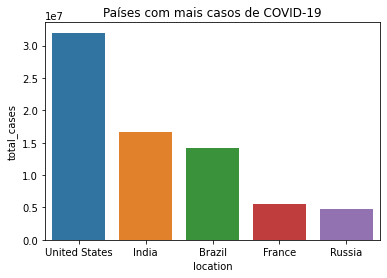

In [47]:
# Gráfico dos países com mais casos confirmados
grafico_cases = sns.barplot(x='location', y= 'total_cases', data= df_cases ).set_title('Países com mais casos de COVID-19')

In [13]:
# Dataset com países com mais mortes
df_deaths = df.loc[df.date == '2021-04-23', ['location' , 'total_deaths']].sort_values(by='total_deaths', ascending=False)[0:5]

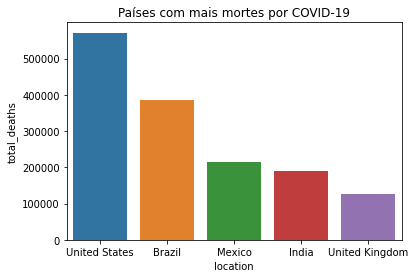

In [58]:
# Gráfico com países com mais mortes
grafico_mortes = sns.barplot(x= 'location', y='total_deaths',data= df_deaths).set_title('Países com mais mortes por COVID-19')

## Como o virús está progredindo ?
 Uma das maiores preocupações das organizações de saúde é a evolução do número de casos e mortes no mundo.

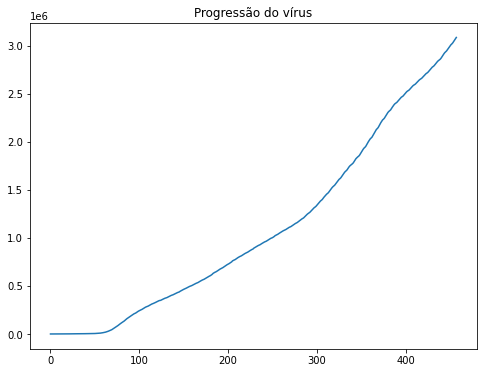

In [15]:
df.loc[df.location == 'World' , 'total_deaths'].reset_index(drop=True).plot(figsize=(8,6));

plt.title('Progressão do vírus')
plt.show()

# Análise Exploratória para o Brasil

Agora que já temos uma noção dos acontecimentos no mundo, vamos analisar a situação no Brasil.

In [16]:
# Criando uma cópia do DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10730,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10731,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10732,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10733,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10734,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [17]:
# Verificando a data mais recente no Brasil
df_brasil.date.max()

Timestamp('2021-04-24 00:00:00')

In [18]:
df_brasil.date.min()

Timestamp('2020-02-26 00:00:00')

Agora sabemos que nosso dataset inclui datas de `26/02/2020` até `24/04/2021`.

Agora vamos verificar quando foi o primeiro caso de COVID no Brasil

In [19]:
# Verificando o primeiro caso de contaminado no Brasil
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)
print('O primeiro caso no Brasil foi registrado em {}'.format(df_brasil.date.loc[10730]))

O primeiro caso no Brasil foi registrado em 2020-02-26 00:00:00


In [28]:
# Verificando os primeiros casos de morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] > 0.0].head(1)
print('O primeiro caso de morte no Brasil foi registrado em {}'.format(df_brasil.date.loc[10750]))

O primeiro caso de morte no Brasil foi registrado em 2020-03-17 00:00:00


Por fim, vamos plotar gráficos de linha para compararmos a evolução dos casos e mortes no Brasil.

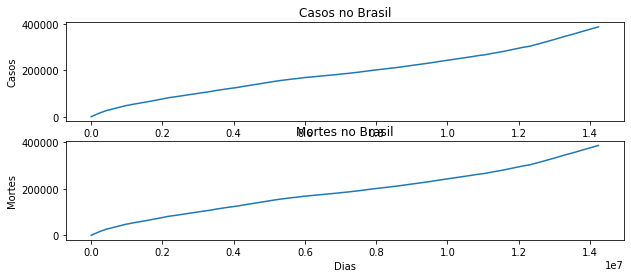

In [38]:
# Plotar os gráficos.
x = df_brasil['total_cases']
z = df_brasil['total_deaths']

fig,(ax1, ax2) = plt.subplots(nrows= 2 , ncols=1,figsize=(10,4))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Mortes no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Mortes')
ax2.plot(x, z)

